# **Programming for Data Science Final Project**

**Student Information:**

StudentID|Full Name
-|-
21127175|Le Anh Thu
21127693|Huynh Duc Thien


## **Table of contents**

1. [Collecting Data](#collect)
   
    a. [About Dataset](#about)
   
    b. [License and Copyright](#license)
   
    c. [How did authors collect data?](#howtocollect)

2. [Exploring Data Analysis (EDA)](#eda)

3. [Asking Meaning Questions](#ask)

4. [Pre-processing & Analyzing Data to Answer each Questions](#pre&anal)

5. [Reflection](#reflection)
   
[References](#references)

## **1. Collecting Data** <a name="collect"></a>

### **a. About Dataset** <a name="about"></a>

- **Heart failure**, a common consequence of **Cardiovascular diseases** (CVDs), is addressed in this [dataset](#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), encompassing **11 distinct features** that enable the prediction of potential heart disease.

<center>
    <img src="Image/Cardiovascular-Disease.png" width="500">
</center>


- Early detection and management are crucial for individuals with cardiovascular disease or those at high cardiovascular risk, stemming from risk factors such as hypertension, diabetes, hyperlipidemia, or pre-existing medical conditions. In this context, the utilization of a machine learning model can prove invaluable.

### **b. License and Copyright** <a name="license"></a>

- **Creators & Donor**:
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
    5. David W. Aha (aha '@' ics.uci.edu)


- **License:** [Open Data Commons Open Database Licnse (ODbL) v1.0](https://opendatacommons.org/licenses/odbl/1-0/). This copyright allows us to use and includes without limitation distributing, copying, publicly performing, publicly displaying, and preparing derivative works of the Database, as well as modifying the Database as may be technically necessary to use it in a different mode or format. (*quote section 1.0 section "Use"*)

### **c. How did authors collect data?** <a name="howtocollect"></a>

This dataset was generated by consolidating multiple previously separate datasets that had not been merged previously. It comprises the combination of five heart-related datasets, all sharing 11 common features. This compilation results in the largest dataset for heart disease research to date. The five source datasets used for this compilation are as follows:

1. **Cleveland**: 303 observations
2. **Hungarian**: 294 observations
3. **Switzerland**: 123 observations
4. **Long Beach VA**: 200 observations
5. **Stalog (Heart) Data Set**: 270 observations

In total, there were 1190 observations across these datasets. After removing duplicate entries (272 observations), the final dataset consists of **918 unique observations**.

## **2. Exploring Data Analysis (EDA)** <a name="eda"></a>

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Read data**

In [2]:
df = pd.read_csv('Data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **Data shape**

In [4]:
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 918
Number of cols: 12


### Rows meaning 
The dataset comprises health information for individual patients, with each row corresponding to a unique patient record. Each record contains a comprehensive set of health-related data for an individual, allowing for a detailed examination of various aspects of patient well-being. The dataset is structured such that each row represents a holistic snapshot of a patient's health profile, facilitating a thorough analysis of health conditions and factors specific to each individual.

### Checking duplicate

In [5]:
dup_rows = df[df.duplicated()]

print(f'Number of duplicated rows: {len(dup_rows)}')

Number of duplicated rows: 0



The data has no duplicates, indicating that our dataset is relatively sound.

### Columns meaning

In [6]:
descriptions = pd.read_csv('Data/description.csv')

pd.set_option('display.max_colwidth', None)
descriptions

,Feature,Meaning
0,Age,Age of the patient [years]
1,Sex,"Sex of the patient [M: Male, F: Female]"
2,ChestPainType,"Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]"
3,RestingBP,Resting blood pressure [mm Hg]
4,Cholesterol,Serum cholesterol [mm/dl]
5,FastingBS,"Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]"
6,RestingECG,"Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]"
7,MaxHR,Maximum heart rate achieved [Numeric value between 60 and 202]
8,ExerciseAngina,"Exercise-induced angina [Y: Yes, N: No]"
9,Oldpeak,Oldpeak = ST [Numeric value measured in depression]


**Reformat categorical column in numeric types**

In [7]:
df['FastingBS'] = df['FastingBS'].map({1: 'Y', 0: 'N'})
df['HeartDisease'] = df['HeartDisease'].map({1: 'Y', 0: 'N'})

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object

### Distribution of numeric values

**Description** </br>

For columns with numeric data types, we calculate:
- Percentage (from 0 to 100) of missing values
- Standard deviation
- The min
- The lower quartile 
- The median
- The upper quartile
- The max

For ease of viewing, we round all values to 1 decimal place using the `.round(1)` method.

In [9]:
num_col_df = df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

def standard_deviation(s):
    return (s.std()).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, standard_deviation, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
missing_ratio,0.0,0.0,0.0,0.0,0.0
standard_deviation,9.4,18.5,109.4,25.5,1.1
min,28.0,0.0,0.0,60.0,-2.6
lower_quartile,47.0,120.0,173.2,120.0,0.0
median,54.0,130.0,223.0,138.0,0.6
upper_quartile,60.0,140.0,267.0,156.0,1.5
max,77.0,200.0,603.0,202.0,6.2


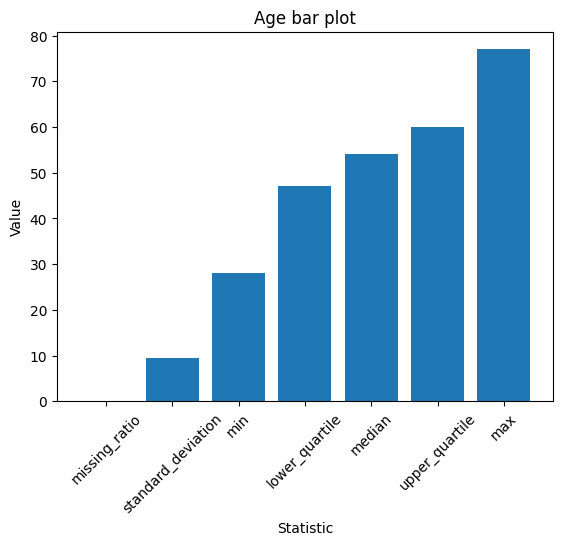

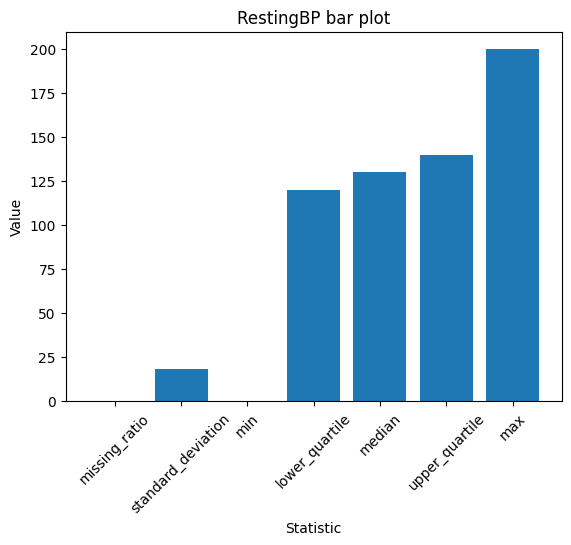

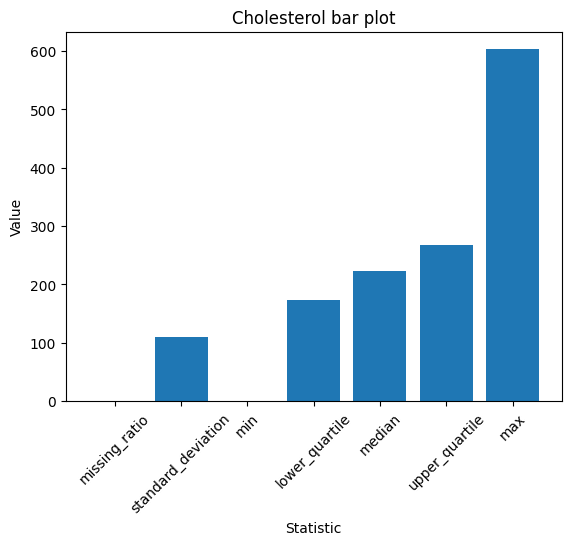

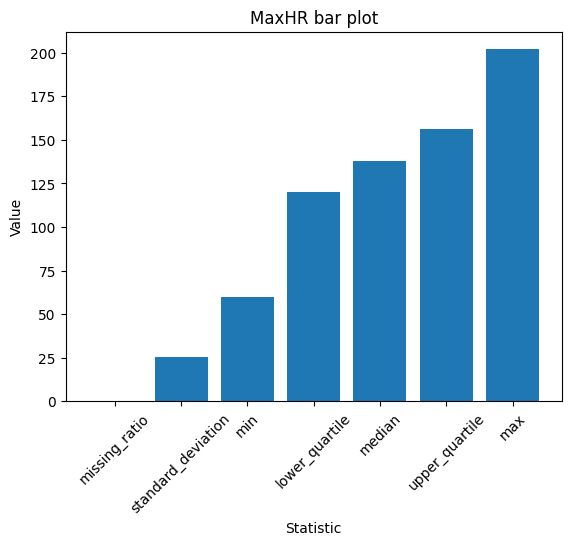

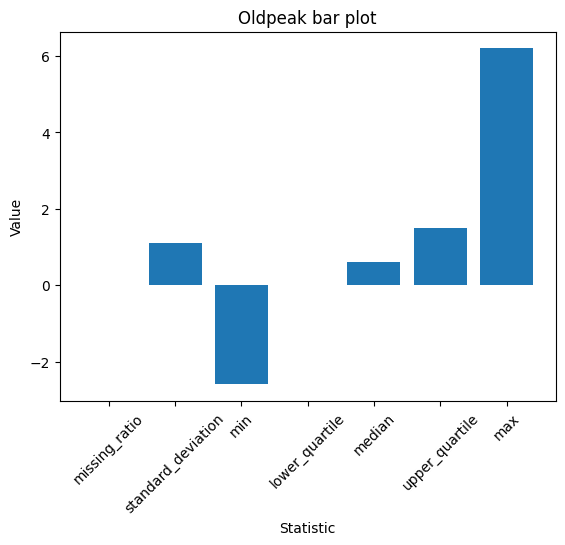

In [10]:
for col in num_col_df.columns:
    x = num_col_info_df.index
    y = num_col_info_df[col]
    
    plt.figure()
    plt.xticks(rotation=45)
    
    plt.bar(x, y)
    plt.title(f'{col} bar plot')
    plt.ylabel('Value')
    plt.xlabel('Statistic')

plt.show()

**Checking numeric values correlations.**

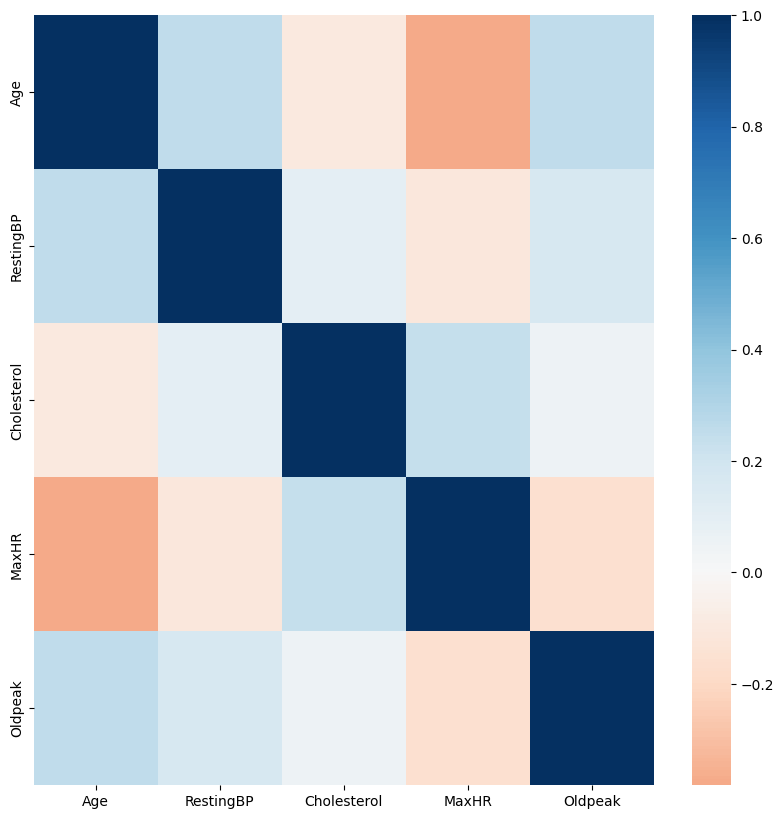

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_col_df.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**Observations**

- After transforming certain categorical features into a more transparent format, we are left with only five numeric columns: Age, RestingBP, Cholesterol, MaxHR, and Oldpeak.

- Notably, the missing ratio for all the aforementioned features is 0, underscoring the cleanliness of our data. This suggests a meticulous collection process in the medical field, minimizing the likelihood of abnormal values.

- Examining the heatmap, it becomes apparent that the numeric features exhibit weak interconnections. They demonstrate a high degree of independence from each other, with each column providing crucial and distinct information about the patient's health.

- We can observe that the age group most susceptible to heart-related diseases, specifically heart failure, falls within the middle to elderly age range. During this phase, the body begins to age, exhibiting signs of health decline and decreased immunity.



### Distribution of categorical values

In [12]:
cat_col_df = df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,4,2,3,2,3,2
value_ratios,"{'M': 79.0, 'F': 21.0}","{'ASY': 54.0, 'NAP': 22.1, 'ATA': 18.8, 'TA': 5.0}","{'N': 76.7, 'Y': 23.3}","{'Normal': 60.1, 'LVH': 20.5, 'ST': 19.4}","{'N': 59.6, 'Y': 40.4}","{'Flat': 50.1, 'Up': 43.0, 'Down': 6.9}","{'Y': 55.3, 'N': 44.7}"


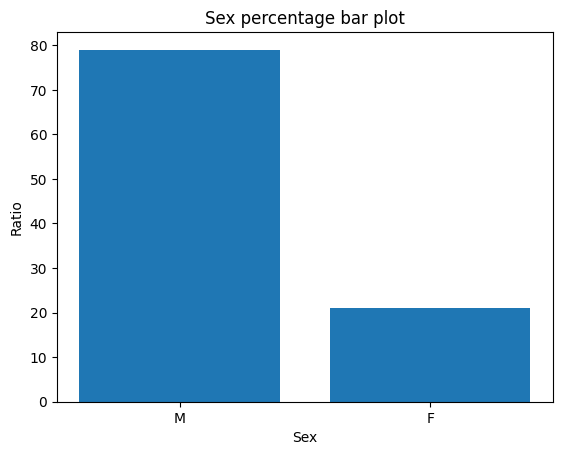

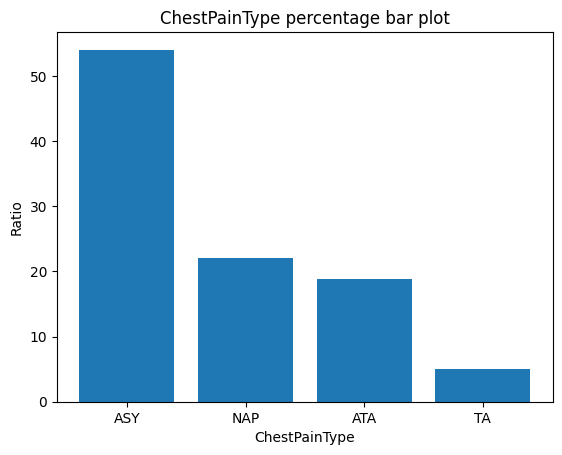

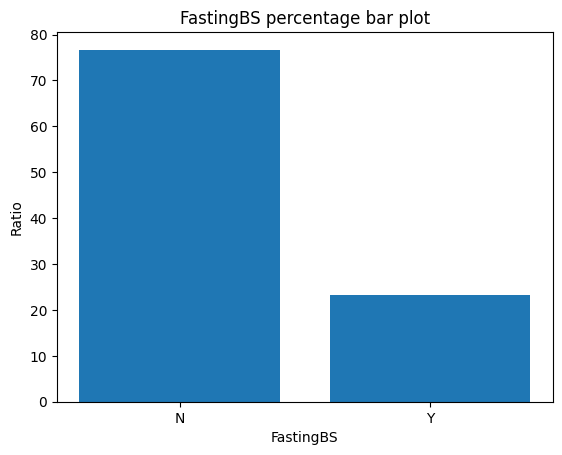

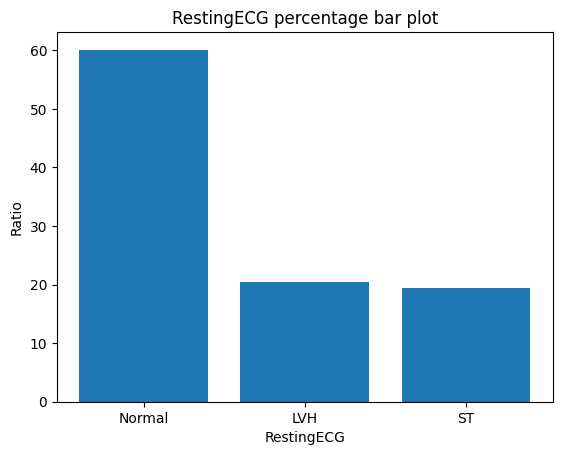

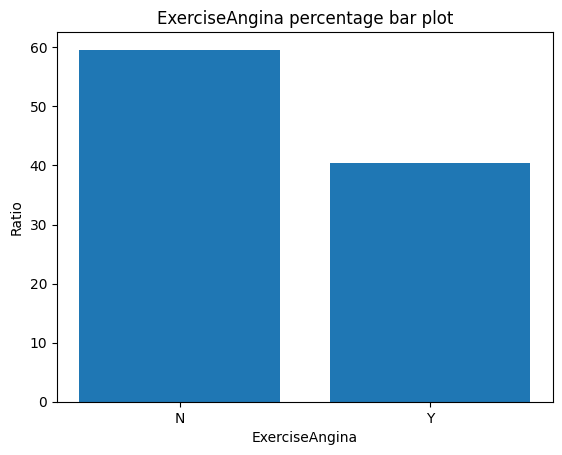

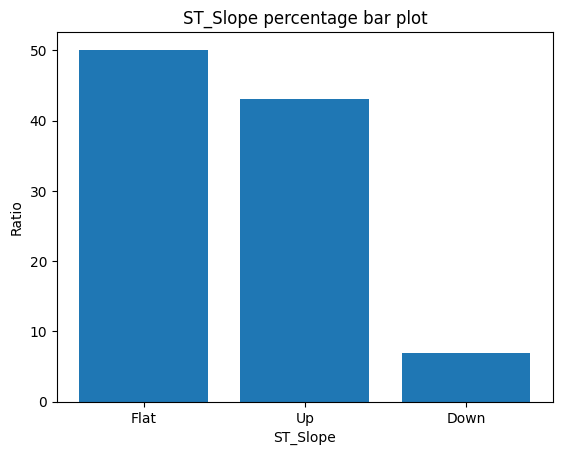

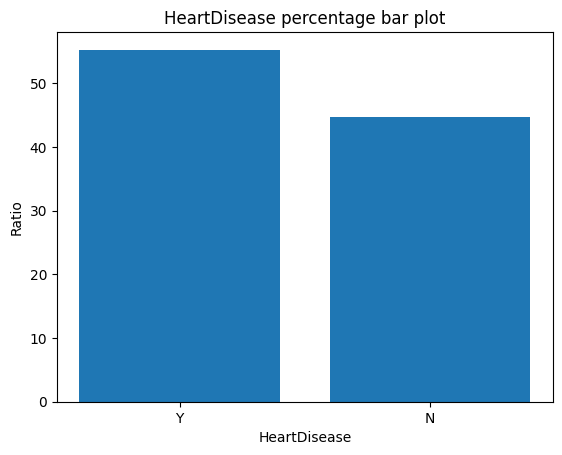

In [13]:
for col in cat_col_df.columns:
    x = cat_col_info_df[col].value_ratios.keys()
    y = cat_col_info_df[col].value_ratios.values()

    plt.figure()
    plt.bar(x, y)
    plt.xlabel(col)
    plt.ylabel('Ratio')
    plt.title(f'{col} percentage bar plot')

plt.show()

**Observations**

- There are more categorical features in this dataset, totaling 7 columns, including Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, and HeartDisease.

- For these columns, the missing ratio is 0, indicating that the data in these columns is relatively sound.

- The gender distribution in the statistics shows a relatively high discrepancy, nearly four times higher for one gender compared to the other. As for the confirmed cases of heart disease, the count is higher compared to non-cases, although the difference is not substantial.

## **3. Asking Meaning Questions** <a name="ask"></a>

## **4. Pre-processing & Analyzing Data to Answer each Questions** <a name="pre&anal"></a>

## **5. Reflection** <a name="reflection"></a>

## **References** <a name="references"></a>